In [1]:

import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error

In [2]:
sys_bp = pd.read_csv("Ex03_SystolicBP_Regreesion.csv")

In [3]:
sys_bp_x = sys_bp.drop("SystolicBP",axis = 1)

In [4]:
sys_bp.head()

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
0,45,1,0,2,2,99.149109,1.680932,35.090422,117.280944
1,62,1,1,4,1,76.609814,1.509772,33.609452,127.346514
2,61,1,0,2,2,72.619743,1.692017,25.365606,122.021401
3,51,1,0,3,2,73.858286,1.604062,28.704958,117.430179
4,42,1,0,2,1,83.861856,1.648855,30.846062,112.765810


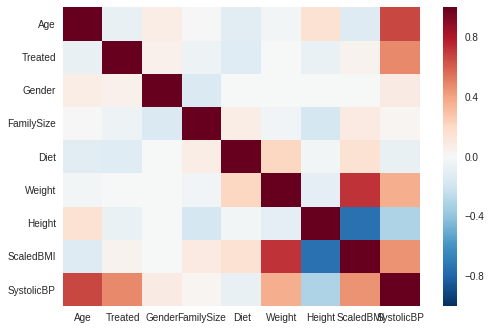

In [5]:
corr = sys_bp.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### SPLIT

In [6]:
train_x_std = np.array(sys_bp_x[:60])
train_y_std = np.array(sys_bp['SystolicBP'][:60])
test_x_std = np.array(sys_bp_x[61:99])
test_y_std = np.array(sys_bp['SystolicBP'][61:99])

In [7]:
alphas = np.linspace(0.001,1.25,10000)*0.5

In [8]:
lasso = linear_model.Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(train_x_std,train_y_std)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

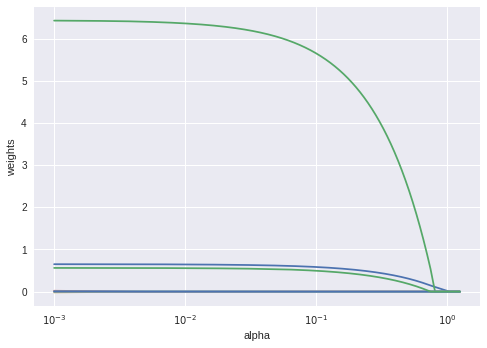

In [9]:
plt.show()

In [10]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(train_x_std,train_y_std)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(train_x_std,train_y_std)
mean_squared_error(test_y_std,lasso.predict(test_x_std))

0.014668823931267668

In [11]:
print(sys_bp_x.columns)
# The coefficients
print("Intercept: \n",lasso.intercept_)
print('Coefficients: \n', lasso.coef_)

Index(['Age', 'Treated', 'Gender', 'FamilySize', 'Diet', 'Weight', 'Height',
       'ScaledBMI'],
      dtype='object')
Intercept: 
 61.2210800171
Coefficients: 
 [ 0.64970365  6.4214193   0.00938439 -0.         -0.00775286  0.00643915
 -0.          0.56121544]


In [12]:
predicted_bp = lasso.predict(test_x_std)

In [13]:
plt.scatter(test_y_std,predicted_bp)